In [1]:
!pip install gdown
!pip install --upgrade -q wandb
!apt-get install unrar

  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for gdown: filename=gdown-4.5.3-py3-none-any.whl size=14821 sha256=69b2743c2c95aba7f5aba68d5ba986023e2cff32fb30c6c3f490de145c04344d
  Stored in directory: /root/.cache/pip/wheels/94/8d/0b/bdcd83555c3555f91a33f6c2384428d9f163c7d75ab0d272b4
Successfully built gdown
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allennlp 2.10.1 requires wandb<0.13.0,>=0.10.0, but you have wandb 0.13.4 which is incompatible.



The following NEW packages will be installed:
  unrar
0 upgraded, 1 newly installed, 0 to remove and 93 not upgraded.
Need to get 113 kB of archives.
After this operation, 406 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 un

In [2]:
#!gdown --id 1dmwoqzyQLaLbfDdELUPKwOjYlLhAmXmy
#!unzip "/kaggle/working/train_data_copia1.zip" -d train

!gdown --id 1TA3RPE-o7J5nPBQZL4RBe2TWbG_Mwrkg
!unzip "/kaggle/working/train_data.zip" -d train   

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1TA3RPE-o7J5nPBQZL4RBe2TWbG_Mwrkg
To: /kaggle/working/train_data.zip
100%|███████████████████████████████████████| 6.22G/6.22G [00:30<00:00, 203MB/s]
Archive:  /kaggle/working/train_data.zip
   creating: train/train_data/
   creating: train/train_data/images/
   creating: train/train_data/images/test/
  inflating: train/train_data/images/test/IMG_20220919_213042.png  
  inflating: train/train_data/images/test/IMG_20220919_213044.png  
  inflating: train/train_data/images/test/IMG_20220920_125020.png  
  inflating: train/train_data/images/test/IMG_20220920_125023.png  
  inflating: train/train_data/images/test/IMG_20220920_125025.png  
  inflating: train/train_data/images/test/IMG_20220920_125027.png  
  inflating: 

In [3]:
!gdown --id 1FAD_bPQoi6EMpdLcvqNEtT0KygwMa5Wd

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1FAD_bPQoi6EMpdLcvqNEtT0KygwMa5Wd
To: /kaggle/working/Hyperparameters_evolve_Adam_640_30Gen_10epocas.yaml
100%|██████████████████████████████████████████| 839/839 [00:00<00:00, 1.28MB/s]


In [4]:
!pip install --upgrade -q wandb
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
import wandb
from ipywidgets import interact
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.2-215-g575055c Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 15.6 GB RAM, 3964.5/4030.6 GB disk)


In [5]:
PATH_DATA = 'train'
PATH_TRAIN = 'train/train_data/images/train'
PATH_VAL   = 'train/train_data/images/val'
PATH_TEST  = 'train/train_data/images/test'
N_CLASSES  = 12
CLASS_NAMES = ['IncaKola_1.5L', 'SanMateo_2.5L', 'Cielo_2.5L', 'MonsterOriginal_473ml', 'MonsterZeroSugar_473ml',
               'RedBull_250ml', 'ME_IncaKola_1.5L', 'ME_SanMateo_2.5L', 'ME_Cielo_2.5L', 'ME_MonsterOriginal_473ml','ME_MonsterZeroSugar_473ml','ME_RedBull_250ml']

f = open('data/products.yaml','w+')

f.write('path: ../'+PATH_DATA+'\n')
f.write('train: ../'+PATH_TRAIN+'\n')
f.write('val:   ../'+PATH_VAL+'\n')
f.write('test:  ../'+PATH_TEST+'\n')
f.write('nc:  '+str(N_CLASSES)+'\n')
f.write('names:  '+str(CLASS_NAMES)+'\n')

f.close()

In [6]:
wandb.login(key='56d0483829ab7ecf66f328860d57dbc1c251236a')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

## **Entrenamiento de modelos**


In [7]:
!python train.py --imgsz 640 --batch 32 --epochs 300 --data '/kaggle/working/yolov5/data/products.yaml' --weights 'yolov5s.pt' --cache --optimizer Adam --hyp '/kaggle/working/Hyperparameters_evolve_Adam_640_30Gen_10epocas.yaml' --patience 0

wandb: Currently logged in as: pieroht (stockrg). Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=/kaggle/working/yolov5/data/products.yaml, hyp=/kaggle/working/Hyperparameters_evolve_Adam_640_30Gen_10epocas.yaml, epochs=300, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=Adam, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=0, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-215-g575055c Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.00947, lrf=0.01, momentum=0.91282, weight_decay=0.0005, warmup_epochs=3.1082, warm

**VALIDATION**

In [8]:
!python val.py --weights '/kaggle/working/yolov5/runs/train/exp/weights/best.pt' --data '/kaggle/working/yolov5/data/products.yaml' --img 640 --iou 0.85 --half

val: data=/kaggle/working/yolov5/data/products.yaml, weights=['/kaggle/working/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.85, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.2-215-g575055c Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7042489 parameters, 0 gradients, 15.9 GFLOPs
val: Scanning '/kaggle/working/train/train_data/labels/val.cache' images and lab
val: WARNING ⚠️ /kaggle/working/train/train_data/images/val/ME_IncaKola_1.5L_567.png: ignoring corrupt image/label: cannot identify image file '/kaggle/working/train/train_data/images/val/ME_IncaKola_1.5L_567.png'
                 Class     Images  Instances          P          R      mAP50   
                   all       1888       2314  

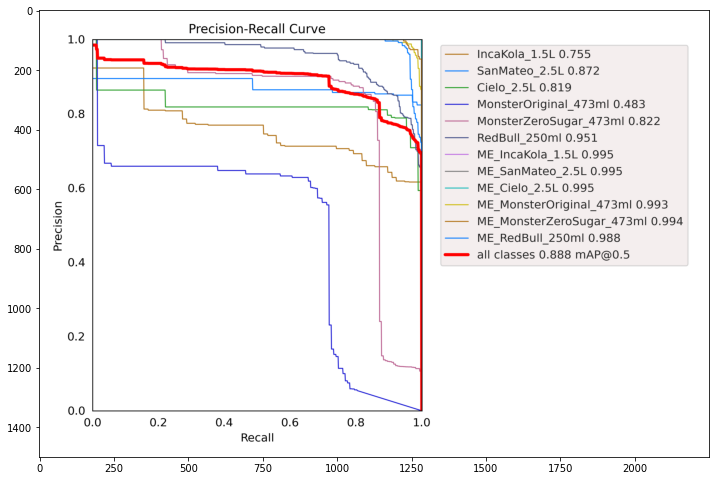

In [9]:
I = cv2.imread('/kaggle/working/yolov5/runs/val/exp/PR_curve.png') # ver path en las ultimas lineas de la ejecución anterior
plt.figure(figsize=(12,12))
plt.imshow(I)
plt.show()

**TESTING**

In [10]:
!python test.py --weights '/kaggle/working/yolov5/runs/train/exp/weights/best.pt' --data '/kaggle/working/yolov5/data/products.yaml' --img 640 --iou 0.85 --task test

python: can't open file 'test.py': [Errno 2] No such file or directory


In [11]:
I = cv2.imread('/kaggle/working/yolov5/runs/val/exp2/PR_curve.png') # ver path en las ultimas lineas de la ejecución anterior
plt.figure(figsize=(12,12))
plt.imshow(I)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/yolov5/runs/val/exp2/PR_curve.png'